# Day 1 exercises - Playing with elliptic curves in Sage

Exercise 0. Make sure you can run the following code (to check everything is working on your system):

In [1]:
2+2

4

Exercise 1. Let $E/\mathbb{Q}$ be the elliptic curve $y^2 = x^3 + 76x + 123$. 

(a) What is the conductor of $E$?

(b) What is the torsion subgroup?

(c) What is the (algebraic) rank of $E$? Find a set of independent generators for the Mordell-Weil group $E(\mathbb{Q})$.

[(-79/121 : 11380/1331 : 1)]

In [2]:
E = EllipticCurve([76,123]);E

Elliptic Curve defined by y^2 = x^3 + 76*x + 123 over Rational Field

In [3]:
E.conductor()

34630192

In [4]:
E.torsion_subgroup()

Torsion Subgroup isomorphic to Trivial group associated to the Elliptic Curve defined by y^2 = x^3 + 76*x + 123 over Rational Field

In [15]:
E.rank()

1

In [12]:
E.gens()

[(-79/121 : 11380/1331 : 1)]

Exercise 2. Let $E/\mathbb{Q}$ be the elliptic curve $y^2 = x^3 - 17x + 1$. 

(a) Plot the real points of $E$.

(b) Choose three primes of good reduction for $E$. For each prime $p$, compute the number of $\mathbb{F}_{p^i}$-points for $1 \leq i \leq 5$. 

(c) Write a function which takes as input an elliptic curve over $\mathbb{Q}$, and a prime of good reduction for that curve, and returns the number of $\mathbb{F}_p$-points on the curve.

(d) Use your function to find an elliptic curve over $\mathbb{F}_{101}$ admitting 123 points (rational over $\mathbb{F}_{101}$).

In [16]:
E= EllipticCurve([-17,1]);E

Elliptic Curve defined by y^2 = x^3 - 17*x + 1 over Rational Field

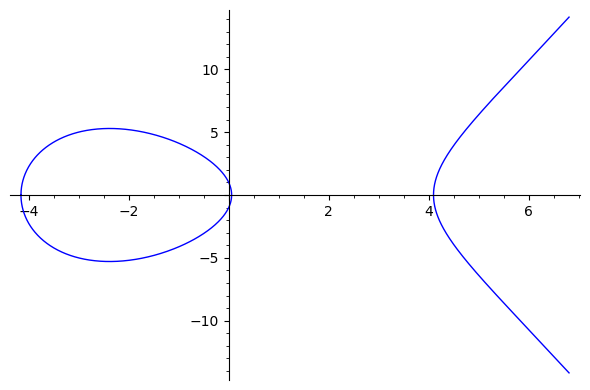

In [21]:
plot(E)


In [24]:
factor(E.discriminant())

2^4 * 5^3 * 157

In [32]:
for p in [3,7,11]:
    for i in [1,2,3,4,5]:
        Epi = EllipticCurve(GF(p^i),[-17,1])
        Npi = Epi.cardinality()
        print(p,i,Npi)

3 1 4
3 2 16
3 3 28
3 4 64
3 5 244
7 1 5
7 2 55
7 3 380
7 4 2475
7 5 16775
11 1 11
11 2 143
11 3 1364
11 4 14443
11 5 160501


In [41]:
def pts(G,l):
    N = G.Np(l)
    return N
print(pts(E,3))


4


In [56]:
for a in range(101):
    for b in range (101):
        Delta = -16*(4*a^3+27*b^2)
        if Delta != 0:
            C = EllipticCurve([a,b])
            if C.discriminant() % 101 != 0 % 101:
                if C.Np(101) == 123:
                    print(a,b)

Exercise 3. Let $K$ be the Galois cubic field of smallest absolute discriminant. What is the polynomial which defines $K$?

In [88]:
R = QQ['x']
x = R.gen()
def discri(a,b,c):
    if (x^3+a*x^2+b*x+c).is_irreducible():
        K.<y> = NumberField(x^3+a*x^2+b*x+c)
        return K.absolute_discriminant()
   
   

for a in range(-10,10):
    for b in range(-10,10):
        for c in range(-10,10):
            if discri(a,b,c)==49:
                print(a,b,c,discri(a,b,c))


-9 -1 1 49
-8 5 1 49
-7 0 7 49
-7 7 7 49
-6 5 -1 49
-5 -8 -1 49
-5 6 -1 49
-4 -4 8 49
-4 3 1 49
-3 -4 -1 49
-2 -8 8 49
-2 -1 1 49
-1 -9 1 49
-1 -2 1 49
0 -7 -7 49
0 -7 7 49
1 -9 -1 49
1 -2 -1 49
2 -8 -8 49
2 -1 -1 49
3 -4 1 49
4 -4 -8 49
4 3 -1 49
5 -8 1 49
5 6 1 49
6 5 1 49
7 0 -7 49
7 7 -7 49
8 5 -1 49
9 -1 -1 49


Exercise 4. Let $a$ be a generator of the number field $K$ in Exercise 3, and let $E/K$ be the elliptic curve $y^2 + ay = x^3 + 10ax + 19$.

(a) What is the conductor of $E$? What is the norm of this conductor?

(b) Choose three prime ideals of good reduction for $E$. For each prime ideal $\mathfrak{p}$, compute the number of $\mathbb{F}_{\mathfrak{p}}$-points.

In [12]:
#We use the Field from LMFDB since we are unsure, wheather Ex. 4 is well posed otherwhise.
f = x^3 - x^2 -2*x + 1
K.<a> = NumberField(f);K

Number Field in a with defining polynomial x^3 - x^2 - 2*x + 1

In [13]:
E = EllipticCurve(K,[0,0,a,10*a,19]); E

Elliptic Curve defined by y^2 + a*y = x^3 + 10*a*x + 19 over Number Field in a with defining polynomial x^3 - x^2 - 2*x + 1

In [105]:
E.conductor()
E.conductor().norm()

3384137285307827

In [106]:
E.conductor()

Fractional ideal (32083*a^2 - 132351*a - 59842)

In [132]:
for l in range(1000):
    
    if l in Primes() and E.conductor().norm() % l  !=0 % l:
         for I in K.primes_above(l):
                   print(l,I,E.reduction(I).cardinality())
       
    


2 Fractional ideal (2) 9
3 Fractional ideal (3) 37
5 Fractional ideal (5) 126
7 Fractional ideal (-a^2 - a + 2) 11
11 Fractional ideal (11) 1380
13 Fractional ideal (a^2 + a - 3) 10
13 Fractional ideal (a^2 - 2*a - 2) 12
13 Fractional ideal (-2*a^2 + a + 2) 10
17 Fractional ideal (17) 4853
19 Fractional ideal (19) 6704
23 Fractional ideal (23) 12231
29 Fractional ideal (3*a^2 - 2*a - 4) 22
29 Fractional ideal (2*a^2 - 3*a - 3) 32
29 Fractional ideal (a^2 - 5) 33
31 Fractional ideal (31) 30022
37 Fractional ideal (37) 50322
41 Fractional ideal (a^2 + 2*a - 4) 51
41 Fractional ideal (2*a^2 - 3*a - 4) 50
41 Fractional ideal (3*a^2 - a - 3) 40
43 Fractional ideal (a^2 - 3*a - 2) 33
43 Fractional ideal (-2*a^2 - a + 5) 44
43 Fractional ideal (-3*a^2 + 2*a + 3) 42
47 Fractional ideal (47) 103299
53 Fractional ideal (53) 148502
59 Fractional ideal (59) 205086
61 Fractional ideal (61) 227553
67 Fractional ideal (67) 299880
71 Fractional ideal (4*a^2 - 3*a - 5) 64
71 Fractional ideal (-3*a^2 + 

Exercise 5. Generalise the function you wrote in Exercise 2 to take as input an elliptic curve over any number field, and a prime ideal $\mathfrak{p}$ of that number field of good reduction, and returns the number of $\mathbb{F}_\mathfrak{p}$-points on the curve.

In [57]:
def redpts(EC,I):
    if  I.is_prime() and EC.has_good_reduction(I):
        return (I,EC.reduction(I).cardinality())
    else: 
        return (I,'bad reduction or not prime')
    
print(redpts(E, K.ideal(4)))

(Fractional ideal (4), 'bad reduction or not prime')


Exercise 6. Let $a$ be a generator of the number field $K$ in Exercise 3, and let $E/K$ be the elliptic curve ${y}^2+a{y}={x}^{3}-a{x}^{2}+\left(652a^{2}-391a-1564\right){x}+10528a^{2}-5979a-24046$. 

Take 200 prime ideals of $K$ of good reduction, and use your function from Exercise 5 to compute the number of points over the reduction. What do you notice? Can you explain this?

In [ ]:
i = 0
E = EllipticCurve(K, [0,-a,a, 652*a^2-391*a-1564, 10528*a^2-5979*a-24046])

for p in range(100):
    for p in Primes():
        for I in K.primes_above(p):
            if i <= 200:
                    print(i,p,redpts(E,I))
                    i += 1
            
        

0 2 (Fractional ideal (2), 13)
1 3 (Fractional ideal (3), 'bad reduction or not prime')
2 5 (Fractional ideal (5), 104)
3 7 (Fractional ideal (-a^2 - a + 2), 13)
4 11 (Fractional ideal (11), 1274)
5 13 (Fractional ideal (a^2 + a - 3), 13)
6 13 (Fractional ideal (a^2 - 2*a - 2), 13)
7 13 (Fractional ideal (-2*a^2 + a + 2), 13)
8 17 (Fractional ideal (17), 4914)
9 19 (Fractional ideal (19), 6916)
10 23 (Fractional ideal (23), 12168)
11 29 (Fractional ideal (3*a^2 - 2*a - 4), 26)
12 29 (Fractional ideal (2*a^2 - 3*a - 3), 26)
13 29 (Fractional ideal (a^2 - 5), 26)
14 31 (Fractional ideal (31), 29900)
15 37 (Fractional ideal (37), 50960)
16 41 (Fractional ideal (a^2 + 2*a - 4), 52)
17 41 (Fractional ideal (2*a^2 - 3*a - 4), 52)
18 41 (Fractional ideal (3*a^2 - a - 3), 52)
19 43 (Fractional ideal (a^2 - 3*a - 2), 39)
20 43 (Fractional ideal (-2*a^2 - a + 5), 39)
21 43 (Fractional ideal (-3*a^2 + 2*a + 3), 39)
22 47 (Fractional ideal (47), 103194)
23 53 (Fractional ideal (53), 149058)
24 59 

183 619 (Fractional ideal (619), 237147196)
184 631 (Fractional ideal (a^2 - a - 10), 624)
185 631 (Fractional ideal (a^2 + 7), 624)
186 631 (Fractional ideal (a - 9), 624)
187 641 (Fractional ideal (641), 263374722)
188 643 (Fractional ideal (-5*a^2 - 3*a + 11), 663)
189 643 (Fractional ideal (8*a^2 - 5*a - 10), 663)
190 643 (Fractional ideal (3*a^2 - 8*a - 4), 663)
191 647 (Fractional ideal (647), 270843898)
192 653 (Fractional ideal (653), 278474508)
193 659 (Fractional ideal (a^2 + a - 11), 624)
194 659 (Fractional ideal (a^2 - 2*a - 10), 624)
195 659 (Fractional ideal (-2*a^2 + a - 6), 624)
196 661 (Fractional ideal (661), 288792400)
197 673 (Fractional ideal (a^2 - 2*a + 8), 715)
198 673 (Fractional ideal (a^2 + a + 7), 715)
199 673 (Fractional ideal (-2*a^2 + a + 12), 715)
200 677 (Fractional ideal (677), 310311378)


The number of points of the reduction at a prime P is roughly $\lvert K(P)\rvert$; This can be explained by Hasse's Theorem $$(N_p-\lvert K(P)\rvert-1)) \leq 2\sqrt{\lvert K(P)\rvert}$$